<a href="https://colab.research.google.com/github/PhoniciaAnne/Unsupervised-Techniques/blob/main/descion_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sns
from sklearn.decomposition import PCA


In [ ]:

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
column_names = [
    'ID', 'Diagnosis', 'Radius_mean', 'Texture_mean', 'Perimeter_mean', 'Area_mean',
    'Smoothness_mean', 'Compactness_mean', 'Concavity_mean', 'Concave_points_mean',
    'Symmetry_mean', 'Fractal_dimension_mean', 'Radius_se', 'Texture_se', 'Perimeter_se',
    'Area_se', 'Smoothness_se', 'Compactness_se', 'Concavity_se', 'Concave_points_se',
    'Symmetry_se', 'Fractal_dimension_se', 'Radius_worst', 'Texture_worst', 'Perimeter_worst',
    'Area_worst', 'Smoothness_worst', 'Compactness_worst', 'Concavity_worst', 'Concave_points_worst',
    'Symmetry_worst', 'Fractal_dimension_worst'
]
data = pd.read_csv(url, header=None, names=column_names)


In [ ]:
data.drop('ID', axis=1, inplace=True)

data['Diagnosis'] = data['Diagnosis'].map({'M': 1, 'B': 0})

In [ ]:
X = data.drop('Diagnosis', axis=1)
y = data['Diagnosis']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [ ]:

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)


y_pred = dtree.predict(X_test)


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


Accuracy: 0.9473684210526315
Confusion Matrix:
[[68  3]
 [ 3 40]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [ ]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

dtree_pca = DecisionTreeClassifier(random_state=42)
dtree_pca.fit(X_train_pca, y_train)
y_pred_pca = dtree_pca.predict(X_test_pca)

In [ ]:


# Creating a mesh grid for plotting decision boundaries
x_min, x_max = X_test_pca[:, 0].min() - 1, X_test_pca[:, 0].max() + 1
y_min, y_max = X_test_pca[:, 1].min() - 1, X_test_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

/usr/local/lib/python3.10/dist-packages/seaborn/relational.py:433: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(x=x, y=y, **kws)


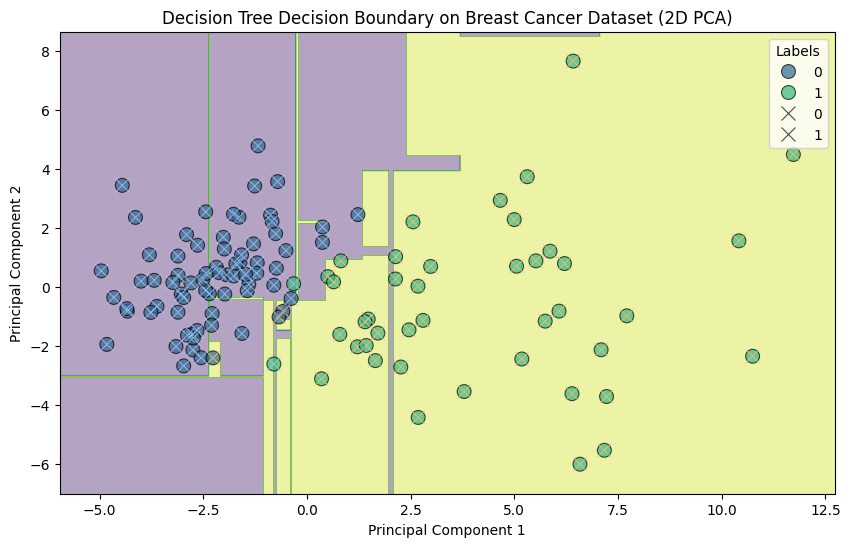

In [ ]:
Z = dtree_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap='viridis')

# Scatter plot for true labels
sns.scatterplot(x=X_test_pca[:, 0], y=X_test_pca[:, 1], hue=y_test, palette='viridis', s=100, alpha=0.7, edgecolor='k')
# Scatter plot for predicted labels
sns.scatterplot(x=X_test_pca[:, 0], y=X_test_pca[:, 1], hue=y_pred_pca, marker='x', palette='coolwarm', s=100, alpha=0.7, edgecolor='k')

plt.title('Decision Tree Decision Boundary on Breast Cancer Dataset (2D PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Labels')
plt.show()


Accuracy: 0.9473684210526315
Confusion Matrix:
[[68  3]
 [ 3 40]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



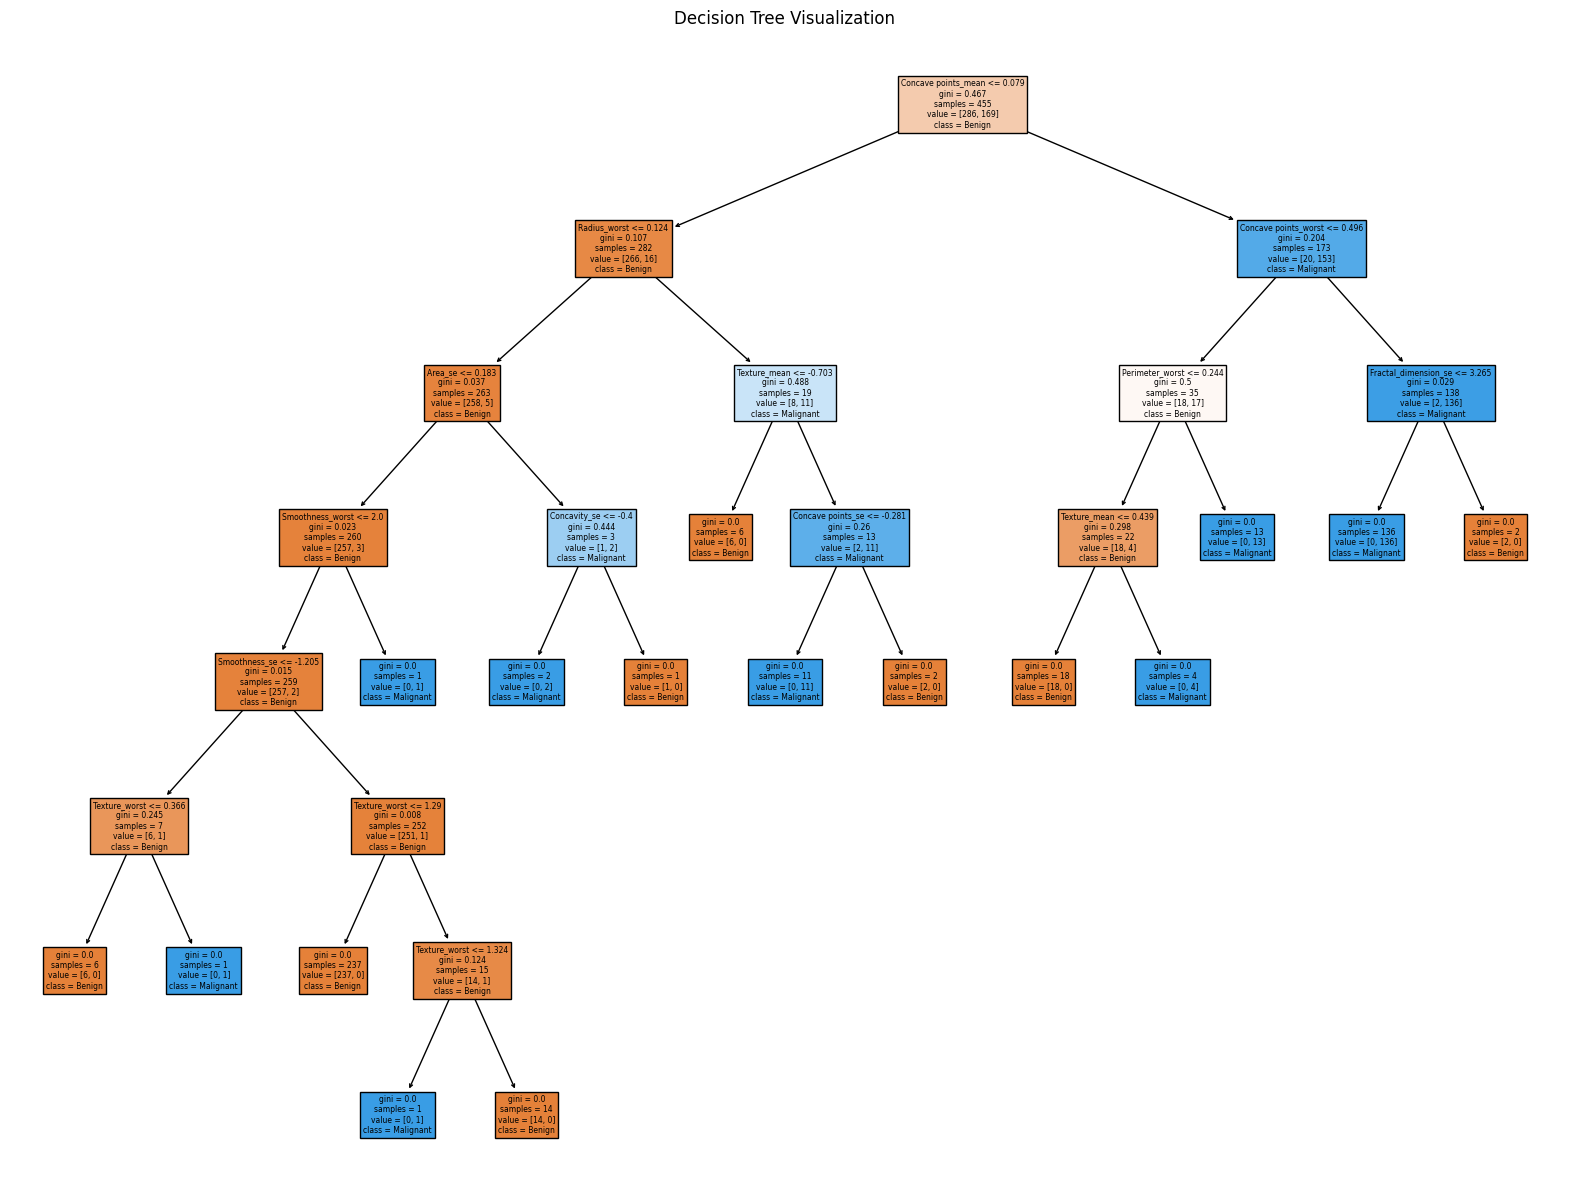

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn import tree

# Load the Breast Cancer Wisconsin dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
column_names = [
    'ID', 'Diagnosis', 'Radius_mean', 'Texture_mean', 'Perimeter_mean', 'Area_mean', 'Smoothness_mean',
    'Compactness_mean', 'Concavity_mean', 'Concave points_mean', 'Symmetry_mean', 'Fractal_dimension_mean',
    'Radius_se', 'Texture_se', 'Perimeter_se', 'Area_se', 'Smoothness_se', 'Compactness_se', 'Concavity_se',
    'Concave points_se', 'Symmetry_se', 'Fractal_dimension_se', 'Radius_worst', 'Texture_worst', 'Perimeter_worst',
    'Area_worst', 'Smoothness_worst', 'Compactness_worst', 'Concavity_worst', 'Concave points_worst',
    'Symmetry_worst', 'Fractal_dimension_worst'
]
data = pd.read_csv(url, header=None, names=column_names)

# Drop the 'ID' column as it's not useful for the model
data = data.drop('ID', axis=1)

# Convert the target variable 'Diagnosis' to binary (M = malignant, B = benign)
data['Diagnosis'] = data['Diagnosis'].map({'M': 1, 'B': 0})

# Separating features and target variable
X = data.drop('Diagnosis', axis=1)
y = data['Diagnosis']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Training the Decision Tree model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Making predictions
y_pred = clf.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

# Visualizing the Decision Tree
plt.figure(figsize=(20,15))
tree.plot_tree(clf, filled=True, feature_names=X.columns, class_names=['Benign', 'Malignant'])
plt.title('Decision Tree Visualization')
plt.show()
